In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import pickle
data = pickle.load(open('/home/jp/projects/icecube/tmp/MC_MC_NewOscFit_woPID.pckl'))

In [3]:
data.keys()

['data_histograms',
 'fit_settings',
 'loader_settings',
 'data_settings',
 'result']

In [44]:
import sys
sys.path.append('/home/jp/projects/icecube/tmp')



# If not empty, this is MC, therefore you will use these values BUT!
# You probably didn't define them all. So you gotta update default dictionary with these
import oscfit_default_values
reload(oscfit_default_values)
nominal_values = oscfit_default_values.default_data_settings
if data['data_settings'] != []:
    nominal_values.update(data['data_settings'])
    


In [63]:
# Start here
skip_keys = ['norm','baseline_llh', 'theta23','dm31','dm32','theta24','theta13','theta34']
result_error_dict = {}
for one_key in data['result']['errors'].keys():
    if one_key in skip_keys:
        continue
    #result_error_dict[one_key] = \
    #    np.array([nominal_values[one_key],data['result'][one_key],data['result']['errors'][one_key]])
    result_error_dict[one_key] = \
        (data['result'][one_key]- nominal_values[one_key])/data['result']['errors'][one_key]      

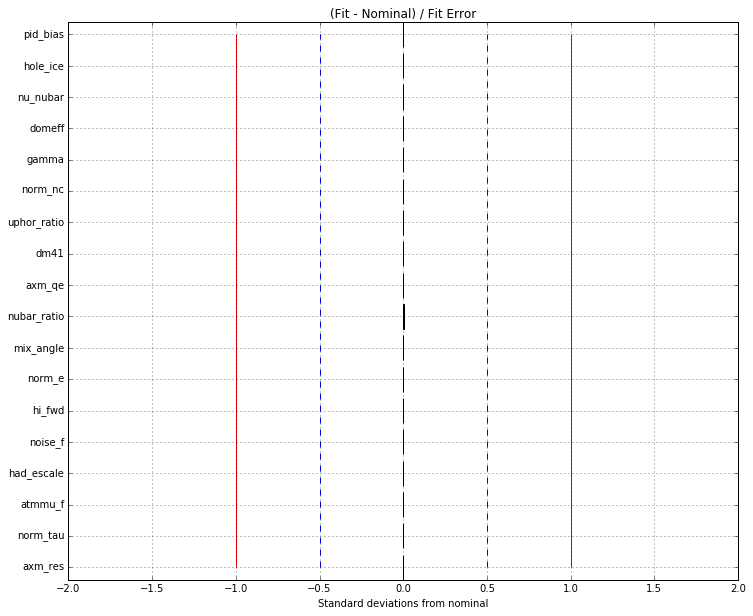

In [78]:

myfig = plt.figure(figsize=(12,10))
pos = np.arange(len(result_error_dict)) + 0.5

plt.barh(pos,result_error_dict.values(), align='center')
plt.yticks(pos, result_error_dict.keys())
plt.xlabel('Standard deviations from nominal')
plt.title('(Fit - Nominal) / Fit Error')
plt.xlim([-2,2])
plt.vlines([-1, -0.5, 0.5,1],pos.min(), pos.max(), 
           colors = ['r','b','b','r'], linestyle = ['-','--','--','-'])
plt.grid(True)

plt.show()

In [62]:
data['result']['errors']['theta23']

0.0001

In [70]:
plt.vlines?